In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.model_selection import StratifiedKFold, train_test_split #,RandomizedSearchCV
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #,classification_report, confusion_matrix, 

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
titles=["SPb", "Sochi", "UBK"]

In [3]:
data_list=[]
for i in range(0, len(titles)):
    title=titles[i]
    fname=title+"reviews_tokenized.csv"
    data=pd.read_csv(fname)
    data.text=data.text.astype('str')
    data_list.append(data)

In [10]:
len(data_list[0])

6199

In [143]:
TF_IDF =[]
data_tfidf=[]
for i in range(0,len(data_list)):
    tfidf=TfidfVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.1, norm=None) #(stop_words=stop, ngram_range=(1, 2), min_df=2, max_df=0.5, norm=None)
    data_tfidf.append(tfidf.fit_transform(data_list[i].text))
    TF_IDF.append(tfidf)

In [96]:
for d in data_list:
    print(len(d))

6199
3311
4574


In [113]:
from sklearn.decomposition import PCA

In [264]:
print(data_tfidf[0].todense().shape,
data_tfidf[1].todense().shape,
data_tfidf[2].todense().shape)

(6199, 9088) (3311, 7566) (4574, 11398)


In [265]:
reducedData=[]
pca_list=[]
for d in data_tfidf:
    pca=(PCA(n_components=3))
    reducedData.append(pca.fit_transform(d.todense()))
    pca_list.append(pca)

In [266]:
for pca in pca_list:
    print(pca.explained_variance_ratio_)

[0.01878074 0.00774134 0.00586267]
[0.02890751 0.00912625 0.00736265]
[0.0261784  0.00875415 0.00764028]


In [267]:
DFs=[]
for d in reducedData:
    DFs.append(pd.DataFrame(d, columns=['X','Y','Z']))

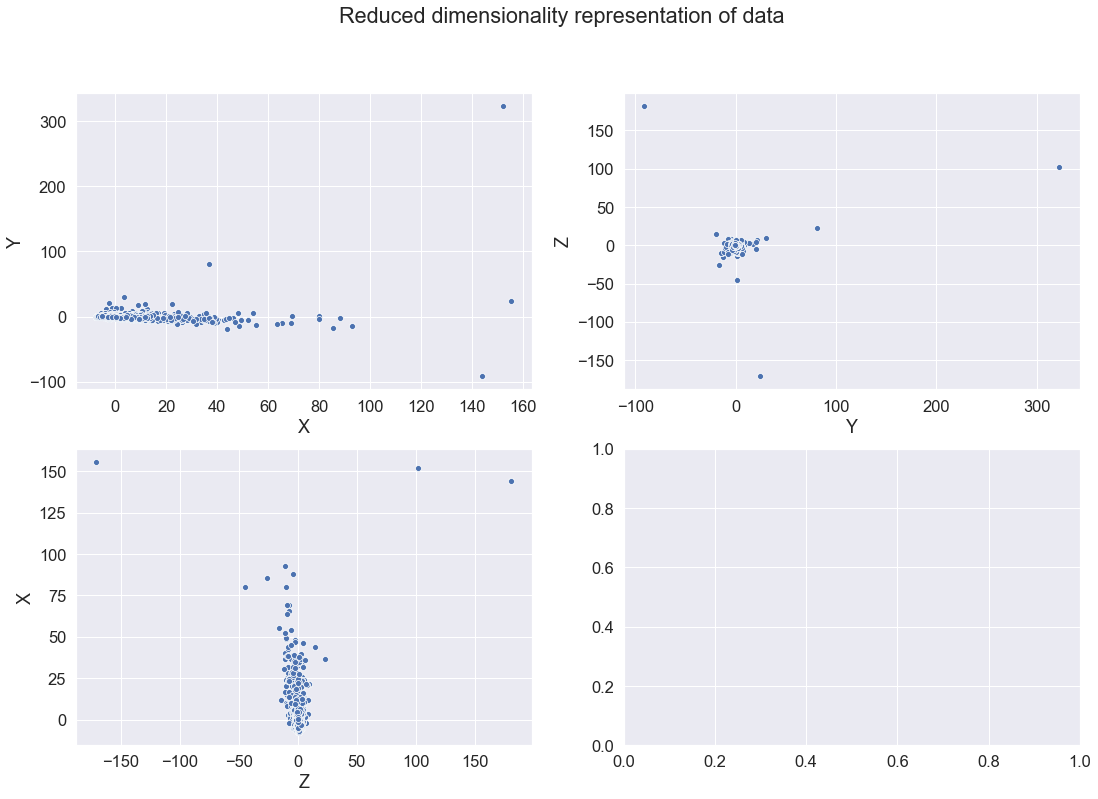

In [270]:
reducedDF=DFs[2]
fig,ax=plt.subplots(figsize=(18,12),nrows=2,ncols=2)
fig.suptitle('Reduced dimensionality representation of data')
sns.set(font_scale=1.5)
plt.subplot(2,2,1)
sns.scatterplot(x=reducedDF.loc[:,'X'],y=reducedDF.loc[:,'Y'])
plt.subplot(2,2,2)
sns.scatterplot(x=reducedDF.loc[:,'Y'],y=reducedDF.loc[:,'Z'])
plt.subplot(2,2,3)
sns.scatterplot(x=reducedDF.loc[:,'Z'],y=reducedDF.loc[:,'X'])

In [271]:
from sklearn.cluster import DBSCAN

## –°–æ—á–∏

In [273]:
model = DBSCAN(10.0)
model.fit(reducedData[1])

DBSCAN(algorithm='auto', eps=10.0, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [249]:
Sochi_ano=model.labels_

In [250]:
Sochi_ano=pd.Series(data=Sochi_ano)

In [251]:
Sochi_ano.value_counts()

 0    3293
-1      18
dtype: int64

In [252]:
Sochi_ano_index=Sochi_ano.loc[Sochi_ano!=0].index

In [253]:
Sochi_raw=pd.read_csv("Sochireviews_cleaned.csv")

In [254]:
Sochi_ano_rev=Sochi_raw.loc[Sochi_ano_index,:]

In [255]:
len(Sochi_ano_rev)

18

(array([3., 2., 4., 2., 5., 0., 0., 1., 0., 1.]),
 array([ 3619. ,  6119.1,  8619.2, 11119.3, 13619.4, 16119.5, 18619.6,
        21119.7, 23619.8, 26119.9, 28620. ]),
 <a list of 10 Patch objects>)

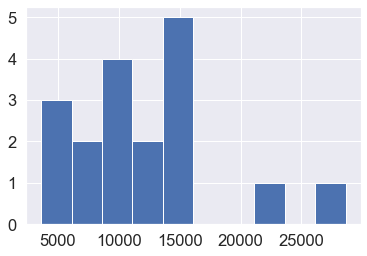

In [256]:
plt.hist(Sochi_ano_rev.text.apply(lambda x: len(x)))

(array([11.,  4.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <a list of 10 Patch objects>)

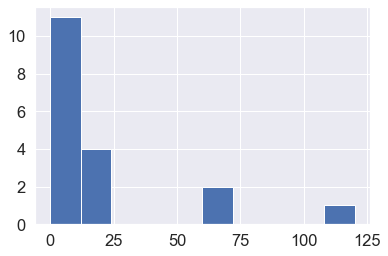

In [257]:
plt.hist(Sochi_ano_rev.time_delta)

(array([6., 0., 0., 0., 0., 6., 0., 0., 0., 6.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 10 Patch objects>)

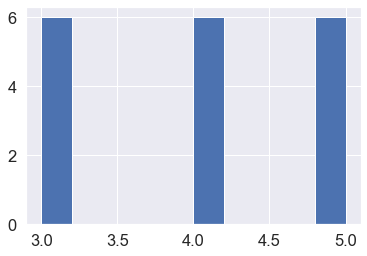

In [258]:
plt.hist(Sochi_ano_rev.mark)

In [260]:
Sochi_ano_rev.reference.value_counts()

https://tophotels.ru/hotel/al10568/reviews     3
https://tophotels.ru/hotel/al35443/reviews     2
https://tophotels.ru/hotel/al36527/reviews     2
https://tophotels.ru/hotel/al196181/reviews    2
https://tophotels.ru/hotel/al306013/reviews    1
https://tophotels.ru/hotel/al197236/reviews    1
https://tophotels.ru/hotel/al70606/reviews     1
https://tophotels.ru/hotel/al10580/reviews     1
https://tophotels.ru/hotel/al100557/reviews    1
https://tophotels.ru/hotel/al18085/reviews     1
https://tophotels.ru/hotel/al41007/reviews     1
https://tophotels.ru/hotel/al125434/reviews    1
https://tophotels.ru/hotel/al50790/reviews     1
Name: reference, dtype: int64

In [262]:
Sochi_ano_rev.head(20)

reference     user  mark  time_delta  \
791    https://tophotels.ru/hotel/al36527/reviews   281056     4           9   
811    https://tophotels.ru/hotel/al36527/reviews  1295074     3          60   
1194   https://tophotels.ru/hotel/al18085/reviews  1776639     3           0   
1273   https://tophotels.ru/hotel/al35443/reviews    74371     5           1   
1293   https://tophotels.ru/hotel/al35443/reviews   371024     4           8   
1460  https://tophotels.ru/hotel/al125434/reviews  1356470     5           3   
1530   https://tophotels.ru/hotel/al10568/reviews   626655     5          19   
1583   https://tophotels.ru/hotel/al10568/reviews        0     3          13   
1584   https://tophotels.ru/hotel/al10568/reviews        0     3          60   
1611   https://tophotels.ru/hotel/al70606/reviews   714686     3           6   
2058   https://tophotels.ru/hotel/al10580/reviews   699472     5          18   
2205   https://tophotels.ru/hotel/al50790/reviews   706787     4           1   
2329  https://tophotels.ru/hotel/al196181/reviews  1271211     5           0   
2340  https://tophotels.ru/hotel/al196181/reviews   966778     5           4   
2879   https://tophotels.ru/hotel/al41007/reviews   300279     3           7   
3042  https://tophotels.ru/hotel/al197236/reviews  1495261     4           7   
3091  https://tophotels.ru/hotel/al100557/reviews    25140     4         120   
3263  https://tophotels.ru/hotel/al306013/reviews   361098     4          23   

                                                   text   conv_date  
791   –î–æ–±—Ä–æ–≥–æ –≤—Å–µ–º –≤—Ä–µ–º–µ–Ω–∏ —Å—É—Ç–æ–∫.\r\n\r\n–ó–ê–°–ï–õ–ï–ù–ò–ï –†...  2017-03-10  
811   –ü–æ–∫–∞ —Å–≤–µ–∂–∏ –≤–æ—Å–ø–æ–º–∏–Ω–∞–Ω–∏—è, –Ω–∞–ø–∏—à—É –æ—Ç–∑—ã–≤. –ö—Å—Ç–∞—Ç–∏ ...  2016-11-21  
1194  –û—Ç–µ–ª—å –°–ø—É—Ç–Ω–∏–∫ –±—ã–ª –≤—ã–±—Ä–∞–Ω –∏—Å—Ö–æ–¥—è –∏–∑ –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–π...  2019-01-16  
1273  –ú—ã –æ—Ç–¥—ã—Ö–∞–ª–∏ –≤ —ç—Ç–æ–º –æ—Ç–µ–ª–µ —Å 30 –∏—é–Ω—è –ø–æ 7 –∏—é–ª—è –≤...  2016-08-07  
1293  –ò–ó –ê–≠–†–û–ü–û–†–¢–ê:\r\n–î–æ–±—Ä–∞–ª–∏—Å—å –æ—á–µ–Ω—å –ø—Ä–æ—Å—Ç–æ‚Ä¶–Ω–∞ –∞–≤—Ç...  2015-05-13  
1460  –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è.........\r\n–•–æ—Ä–æ—à–∏–π –æ—Ç–µ–ª—å —Å –ø—Ä–æ–≥—Ä...  2019-12-03  
1530  –ù–∞—á–Ω—É —Å–≤–æ–π –æ—Ç–∑—ã–≤ –æ–± —ç—Ç–æ–º –º–µ—Å—Ç–µ —Å —Ç–æ–≥–æ, —Å —á–µ–≥–æ ...  2018-08-09  
1583  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –ü–∏—à—É –æ—Ç–∑—ã–≤ –¥–ª—è —Ç—É—Ä–∏—Å—Ç–æ–≤ —Ç—â–∞—Ç–µ–ª—å–Ω–æ...  2014-01-14  
1584  –ï—Å–ª–∏ —Ç–æ–ª—å–∫–æ –≤ –¥–≤—É—Ö —Å–ª–æ–≤–∞—Ö –æ–± ¬´–æ—Ç–¥—ã—Ö–µ¬ª –≤ ¬´–ó–∞–ø–æ–ª...  2013-09-16  
1611  –û—Ç–¥—ã—Ö–∞–ª–∏ –≤–¥–≤–æ–µ–º —Å —Ä–µ–±–µ–Ω–∫–æ–º 9 –ª–µ—Ç. –í–µ—Ä–Ω—É–ª–∏—Å—å –∏–∑...  2018-07-31  
2058  –í–°–¢–£–ü–õ–ï–ù–ò–ï\r\n–í—ã–±–æ—Ä –Ω–∞ —Å–∞–Ω–∞—Ç–æ—Ä–∏–π –ú–µ—Ç–∞–ª–ª—É—Ä–≥ –ø–∞–ª...  2019-12-08  
2205  –ö–∞–∫ –≤—Å–µ–≥–¥–∞ —Å–≤–æ–π –æ—Ç–¥—ã—Ö –º—ã —Å —Å—É–ø—Ä—É–≥–æ–π –≤ 2016 –≥–æ–¥...  2016-06-07  
2329  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, —è –æ—Ç–¥—ã—Ö–∞–ª–∞ –≤ –°–æ—á–∏ —Å 05.09.2016 –ø...  2016-09-28  
2340  –û—Ç–¥—ã—Ö–∞–ª–∏ 3 –Ω–µ–¥–µ–ª–∏ –≤ –º–∞–µ 2015 –≥–æ–¥–∞ —Å –∂–µ–Ω–æ–π –∏ –¥–æ...  2015-05-27  
2879  –í –ø–µ—Ä–≤—ã–π —Ä–∞–∑ –±—ã–ª–∏ –≤ –ü—Ä–æ–≥—Ä–µ—Å—Å–µ –≤ 2007 –≥–æ–¥—É. –°–ø—É...  2015-06-13  
3042  –û—Ç–¥—ã—Ö–∞–ª –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ –∞–≤–≥—É—Å—Ç–∞ 2017 –≥–æ–¥–∞. –° –ø–æ–≥–æ–¥–æ...  2017-07-09  
3091  –û—Ç–∑—ã–≤ –æ –º–∏–Ω–∏- –æ—Ç–µ–ª–µ –ì–æ—Å—Ç–µ–≤–æ–π –î–æ–º ¬´–í–ò–ö–¢–û–†¬ª, 3* ...  2012-11-11  
3263  –í—Å–µ–º —Å–Ω–æ–≤–∞ –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ!\r\n–ï—Å–ª–∏ –≤—ã —Å–ª–µ–¥–∏—Ç–µ –∑–∞...  2018-01-08

In [263]:
Sochi_ano_rev.iloc[0,4]

'–î–æ–±—Ä–æ–≥–æ –≤—Å–µ–º –≤—Ä–µ–º–µ–Ω–∏ —Å—É—Ç–æ–∫.\r\n\r\n–ó–ê–°–ï–õ–ï–ù–ò–ï –†–ê–ó–ú–ï–©–ï–ù–ò–ï\r\n\r\n          –ó–∞—Å–µ–ª–µ–Ω–∏–µ –ø—Ä–æ—à–ª–æ –±—ã—Å—Ç—Ä–æ. –ù–∞ —Ä–µ—Å–µ–ø—à–µ–Ω–µ –Ω–∞—Å –ø–æ–ø—Ä–æ—Å–∏–ª–∏ –ø—Ä–µ–¥—ä—è–≤–∏—Ç—å –Ω–∞—à–∏ –ø—É—Ç—ë–≤–∫–∏ –∏ –ø–∞—Å–ø–æ—Ä—Ç–∞ –∏ –ø–æ–¥–æ–∂–¥–∞—Ç—å –≤ —Ö–æ–ª–µ. –ß–µ—Ä–µ–∑ –Ω–µ–ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ–µ –≤—Ä–µ–º—è –Ω–∞–º –¥–∞–ª–∏ –∫–ª—é—á–∏ –æ—Ç –Ω–æ–º–µ—Ä–∞ –∏ —Å–∫–∞–∑–∞–ª–∏ –∫—É–¥–∞ –∏–¥—Ç–∏. –ü—Ä–æ–≤–æ–∂–∞—Ç—å –Ω–∞—Å –¥–æ –Ω–æ–º–µ—Ä–∞ –Ω–∞—Å –Ω–∏–∫—Ç–æ –Ω–µ —Å—Ç–∞–ª. –ë–ª–∞–≥–æ, —á—Ç–æ –Ω–æ–º–µ—Ä –±—ã–ª –≤ —Ç–æ–º –∂–µ –∑–¥–∞–Ω–∏–∏ —á—Ç–æ –∏ —Ä–µ—Å–µ–ø—à–Ω, –ø–æ—ç—Ç–æ–º—É –∏–¥—Ç–∏ –æ–∫–∞–∑–∞–ª–æ—Å—å –Ω–µ –¥–∞–ª–µ–∫–æ. –¢–æ–ª—å–∫–æ –ø–∞—Å–ø–æ—Ä—Ç–∞ –∏ –¥–æ–∫—É–º–µ–Ω—Ç—ã –Ω–∞–º —Å—Ä–∞–∑—É –Ω–µ –æ—Ç–¥–∞–ª–∏, –∞ —Å–∫–∞–∑–∞–ª–∏, —á—Ç–æ –∑–∞ –Ω–∏–º–∏ –º–æ–∂–Ω–æ –±—É–¥–µ—Ç –ø–æ–¥–æ–π—Ç–∏ —á–µ—Ä–µ–∑ —á–∞—Å–∞ –ø–æ–ª—Ç–æ—Ä–∞, —Ç–∞–∫ –∫–∞–∫ –∏–º –Ω—É–∂–Ω–æ –≤—Ä–µ–º—è —á—Ç–æ–±—ã –≤—Å—ë –æ—Ñ–æ—Ä–º–∏—Ç—å. –ù–∏–∫–∞–∫–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –∫–

## –ö—Ä—ã–º

In [274]:
model = DBSCAN(10.0)
model.fit(reducedData[2])

DBSCAN(algorithm='auto', eps=10.0, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [275]:
UBK_ano=model.labels_

In [276]:
UBK_ano=pd.Series(data=UBK_ano)

In [277]:
UBK_ano.value_counts()

 0    4551
-1      23
dtype: int64

In [278]:
UBK_ano_index=UBK_ano.loc[UBK_ano!=0].index

In [279]:
UBK_raw=pd.read_csv("UBKreviews_cleaned.csv")

In [280]:
UBK_ano_rev=UBK_raw.loc[UBK_ano_index,:]

In [281]:
len(UBK_ano_rev)

23

(array([1., 2., 2., 4., 7., 3., 2., 0., 0., 2.]),
 array([ 1985. ,  4827.4,  7669.8, 10512.2, 13354.6, 16197. , 19039.4,
        21881.8, 24724.2, 27566.6, 30409. ]),
 <a list of 10 Patch objects>)

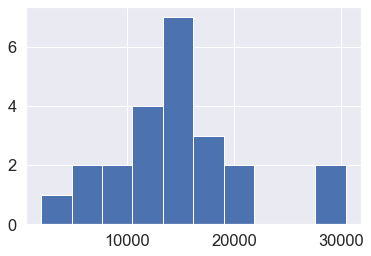

In [282]:
plt.hist(UBK_ano_rev.text.apply(lambda x: len(x)))

(array([16.,  3.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <a list of 10 Patch objects>)

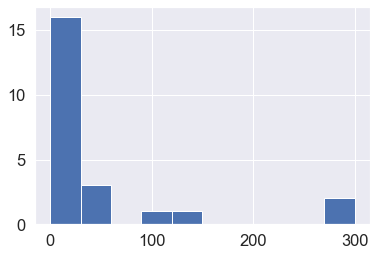

In [283]:
plt.hist(UBK_ano_rev.time_delta)

(array([ 5.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  6.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 10 Patch objects>)

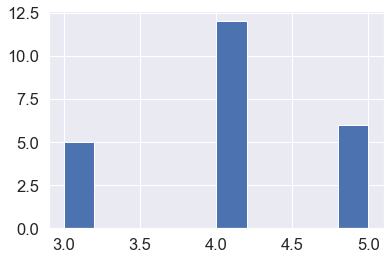

In [284]:
plt.hist(UBK_ano_rev.mark)

In [285]:
UBK_ano_rev.reference.value_counts()

https://tophotels.ru/hotel/al19774/reviews    6
https://tophotels.ru/hotel/al35508/reviews    4
https://tophotels.ru/hotel/al19743/reviews    3
https://tophotels.ru/hotel/al19748/reviews    2
https://tophotels.ru/hotel/al19739/reviews    2
https://tophotels.ru/hotel/al84868/reviews    1
https://tophotels.ru/hotel/al41782/reviews    1
https://tophotels.ru/hotel/al19780/reviews    1
https://tophotels.ru/hotel/al40340/reviews    1
https://tophotels.ru/hotel/al84057/reviews    1
https://tophotels.ru/hotel/al19752/reviews    1
Name: reference, dtype: int64

In [286]:
UBK_ano_rev.head(25)

reference     user  mark  time_delta  \
176   https://tophotels.ru/hotel/al19743/reviews   129018     5          30   
198   https://tophotels.ru/hotel/al19743/reviews  1134488     5          90   
228   https://tophotels.ru/hotel/al19743/reviews        0     5           3   
327   https://tophotels.ru/hotel/al35508/reviews  1457790     3         300   
395   https://tophotels.ru/hotel/al35508/reviews  1240337     3           0   
562   https://tophotels.ru/hotel/al19774/reviews  1223518     4           0   
653   https://tophotels.ru/hotel/al19774/reviews   120948     4           2   
657   https://tophotels.ru/hotel/al19774/reviews   227889     4          10   
1079  https://tophotels.ru/hotel/al35508/reviews  1457790     3         300   
1147  https://tophotels.ru/hotel/al35508/reviews  1240337     3           0   
1314  https://tophotels.ru/hotel/al19774/reviews  1223518     4           0   
1405  https://tophotels.ru/hotel/al19774/reviews   120948     4           2   
1409  https://tophotels.ru/hotel/al19774/reviews   227889     4          10   
1927  https://tophotels.ru/hotel/al41782/reviews   547762     5          30   
2242  https://tophotels.ru/hotel/al84868/reviews   580877     4           3   
2318  https://tophotels.ru/hotel/al19748/reviews  1458461     4           2   
2319  https://tophotels.ru/hotel/al19748/reviews  1458461     4           2   
2389  https://tophotels.ru/hotel/al19739/reviews  1129692     4          30   
2425  https://tophotels.ru/hotel/al19739/reviews   160137     4           2   
2686  https://tophotels.ru/hotel/al19752/reviews        0     4         120   
3112  https://tophotels.ru/hotel/al84057/reviews   179288     5          12   
3856  https://tophotels.ru/hotel/al19780/reviews  1056061     5           0   
4132  https://tophotels.ru/hotel/al40340/reviews  1457757     3           2   

                                                   text   conv_date  
176   –ù–æ–≤–æ–µ –∫—Ä—ã–º—Å–∫–æ–µ —É—Ç—Ä–æ –Ω–∞—Å—Ç–æ–π—á–∏–≤–æ –ø—Ä–æ–≥–æ–Ω—è–µ—Ç –Ω–æ—á–Ω–æ...  2017-07-29  
198   Porto Mare - –ª—É—á—à–∏–π –æ—Ç–µ–ª—å –¥–ª—è —Å–µ–º–µ–π–Ω–æ–≥–æ –æ—Ç–¥—ã—Ö–∞...  2015-12-20  
228   –£ –ª—é–±–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞ –∏–∑ –ø–æ—Å—Ç-—Å–æ–≤–µ—Ç—Å–∫–æ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å...  2013-11-29  
327   –ö–†–ê–¢–ö–ò–ô –û–¢–ó–´–í  —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏—è –æ—Ç–µ–ª—è –Ω–∞ 3–∫—É, –Ω–æ–º–µ—Ä–∞...  2017-02-08  
395   –û—Ç–¥—ã—Ö–∞–ª–∏ —Å —Å—ã–Ω–æ–º 6-—Ç–∏ –ª–µ—Ç –≤ –ø–∞–Ω—Å–∏–æ–Ω–∞—Ç–µ "–ù–µ–≤–∞" ...  2016-10-08  
562   –í—Å–µ–º –¥–æ–±—Ä—ã–π –¥–µ–Ω—å, –æ—Ç–∑—ã–≤ –ø–∏—à—É –Ω–∞—Ö–æ–¥—è—Å—å –≤ –æ—Ç–µ–ª–µ ...  2016-07-18  
653   –í —ç—Ç–æ–º –≥–æ–¥—É —Å –æ—Ç–¥—ã—Ö–æ–º —É –Ω–∞—Å –Ω–µ —Å–ª—É—á–∏–ª–æ—Å—å –∏–∑-–∑–∞...  2014-08-26  
657   –î–æ–±—Ä–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ —Å—É—Ç–æ–∫ –≤—Å–µ–º, –∫—Ç–æ —á–∏—Ç–∞–µ—Ç –º–æ–π –æ—Ç–∑...  2014-07-14  
1079  –ö–†–ê–¢–ö–ò–ô –û–¢–ó–´–í  —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏—è –æ—Ç–µ–ª—è –Ω–∞ 3–∫—É, –Ω–æ–º–µ—Ä–∞...  2017-02-08  
1147  –û—Ç–¥—ã—Ö–∞–ª–∏ —Å —Å—ã–Ω–æ–º 6-—Ç–∏ –ª–µ—Ç –≤ –ø–∞–Ω—Å–∏–æ–Ω–∞—Ç–µ "–ù–µ–≤–∞" ...  2016-10-08  
1314  –í—Å–µ–º –¥–æ–±—Ä—ã–π –¥–µ–Ω—å, –æ—Ç–∑—ã–≤ –ø–∏—à—É –Ω–∞—Ö–æ–¥—è—Å—å –≤ –æ—Ç–µ–ª–µ ...  2016-07-18  
1405  –í —ç—Ç–æ–º –≥–æ–¥—É —Å –æ—Ç–¥—ã—Ö–æ–º —É –Ω–∞—Å –Ω–µ —Å–ª—É—á–∏–ª–æ—Å—å –∏–∑-–∑–∞...  2014-08-26  
1409  –î–æ–±—Ä–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ —Å—É—Ç–æ–∫ –≤—Å–µ–º, –∫—Ç–æ —á–∏—Ç–∞–µ—Ç –º–æ–π –æ—Ç–∑...  2014-07-14  
1927  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ!\r\n\r\n–ï—Å–ª–∏ –∫—Ä–∞—Ç–∫–æ ‚Äì –≤ –î–µ–º–µ—Ä–¥–∂–∏ ...  2019-11-08  
2242  –û—Ç–¥—ã—Ö–∞–ª–∏ –≤ –æ—Ç–µ–ª–µ —Å 6 –ø–æ 14 –∞–ø—Ä–µ–ª—è 2019 –≥–æ–¥–∞ –≤–¥...  2019-04-17  
2318  –°–µ–≥–æ–¥–Ω—è —Ö–æ—á—É –Ω–∞–ø–∏—Å–∞—Ç—å —Å–≤–æ–π –æ—Ç–∑—ã–≤ –ø—Ä–æ –æ—Ç–µ–ª—å ¬´–ú–æ...  2019-03-31  
2319  üëâ–°–µ–≥–æ–¥–Ω—è —Ö–æ—á—É –Ω–∞–ø–∏—Å–∞—Ç—å —Å–≤–æ–π –æ—Ç–∑—ã–≤ –ø—Ä–æ –æ—Ç–µ–ª—å ¬´–ú...  2019-03-31  
2389  –°–æ–±—Å—Ç–≤–µ–Ω–Ω–æ –ø–æ–∏–∑—É—á–∞–≤ —á—Ç–æ –¥–∞ –∫–∞–∫ –º–æ–∂–Ω–æ –æ—Ç–¥–æ—Ö–Ω—É—Ç—å...  2019-09-28  
2425  –ü—Ä–µ–¥—ã—Å—Ç–æ—Ä–∏—è.\r\n\r\n–ï–∑–¥–∏–ª–∞ –≤ –æ—Ç–ø—É—Å–∫ —Å –º–∞–º–æ–π, —É...  2016-12-06  
2686  –û–¢–ï–õ–¨ ¬´–õ–ï–í–ê–ù–¢¬ª\r\n–°—Ä–µ–¥–∏ –ø—ã—à–

In [287]:
UBK_ano_rev.iloc[3,4]

'–ö–†–ê–¢–ö–ò–ô –û–¢–ó–´–í  —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏—è –æ—Ç–µ–ª—è –Ω–∞ 3–∫—É, –Ω–æ–º–µ—Ä–∞  3 (–∑–∞ —Å–ª—ã—à–∏–º–æ—Å—Ç—å –∏ —Å–ª–æ–º–∞–Ω–Ω—ã–π —É–Ω–∏—Ç–∞–∑), —É–±–æ—Ä–∫–∞ –≤ –Ω–æ–º–µ—Ä–∞—Ö  2, –ø–ª—è–∂  1, –æ–ø–∞—Å–Ω—ã–π –¥–ª—è –∂–∏–∑–Ω–∏ –∏ –∑–¥–æ—Ä–æ–≤—å—è –æ—Ç–¥—ã—Ö–∞—é—â–∏—Ö, —Å–µ—Ä–≤–∏—Å  3, –ø–∏—Ç–∞–Ω–∏–µ  2, —Ö—É–¥—à–µ–µ –ø–∏—Ç–∞–Ω–∏–µ –≤ –æ—Ç–µ–ª–µ –∑–∞ –≤—Å–µ –º–æ–∏ –æ—Ç–ø—É—Å–∫–∞! –ê–Ω–∏–º–∞—Ü–∏—è  4. –ó–∞ –ø–æ–¥—Ä–æ–±–Ω–æ—Å—Ç—è–º–∏  —á–∏—Ç–∞–π—Ç–µ –Ω–∏–∂–µ.\r\n–û—Ç–¥—ã—Ö–∞–ª–∏ –≤ –ø–∞–Ω—Å–∏–æ–Ω–∞—Ç–µ –ù–µ–≤–∞ —Å –º—É–∂–µ–º –≤ –Ω–∞—á–∞–ª–µ —Å–µ–Ω—Ç—è–±—Ä—è 2016 –≥–æ–¥–∞. –ö–æ–≥–¥–∞ –≤—ã–±–∏—Ä–∞–ª–∏ –æ—Ç–µ–ª—å –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –∏–∑—É—á–∏–ª–∏ –æ—Ç–∑—ã–≤—ã –∏ —Ä–µ–π—Ç–∏–Ω–≥–∏ –Ω–∞ —ç—Ç–æ–º –∏ –¥—Ä—É–≥–∏—Ö —Å–∞–π—Ç–∞—Ö –∏ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ —Ö–æ—Ä–æ—à–µ–≥–æ —Ä–µ–π—Ç–∏–Ω–≥–∞ –∏ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –≤—ã–±—Ä–∞–ª–∏ –ø–∞–Ω—Å–∏–æ–Ω–∞—Ç –ù–µ–≤–∞ –ò –∫–∞–∫ –∂–µ –º—ã –æ—à–∏–±–ª–∏—Å—å \r\n–ù–∞—á–∞–ª–æ—Å—å –≤—Å–µ —Å –∑–∞–µ–∑–¥–∞  –º—ã –∑–∞–∫

# –ò—Ç–∞–∫, "–∞–Ω–æ–º–∞–ª–∏–∏" –≤ TF-IDF - —ç—Ç–æ –æ—á–µ–Ω—å –¥–ª–∏–Ω–Ω—ã–µ –æ—Ç–∑—ã–≤—ã, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –º–Ω–æ–≥–æ –Ω–µ–æ–±—ã—á–Ω—ã—Ö —Å–ª–æ–≤